In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 20
pd.options.display.max_rows = None

In [2]:
cars = pd.read_csv('cars.csv')

In [3]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [4]:
cars.shape #406 rows and 9 columns

(406, 9)

In [5]:
#checking 0's in the cars dataset
0 in cars.values

True

In [6]:
cars[cars["MPG"]==0] #rows having 0 values for MPG

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe


In [7]:
cars[cars["Horsepower"]==0] #rows having 0 values for Horsepower

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
38,Ford Pinto,25.0,4,98.0,0,2046,19.0,71,US
133,Ford Maverick,21.0,6,200.0,0,2875,17.0,74,US
337,Renault Lecar Deluxe,40.9,4,85.0,0,1835,17.3,80,Europe
343,Ford Mustang Cobra,23.6,4,140.0,0,2905,14.3,80,US
361,Renault 18i,34.5,4,100.0,0,2320,15.8,81,Europe
382,AMC Concord DL,23.0,4,151.0,0,3035,20.5,82,US


# Filtering the rows

In [8]:
#taking the required columns
df = cars[["Cylinders","Weight","Horsepower","MPG"]]

In [9]:
#filtering the rows having non zero value for the variable Horsepower into df
df = df[df["Horsepower"]!=0]

In [10]:
#filtering the rows having non zero value value for the variable MPG into df
df = df[df["MPG"]!=0]

In [11]:
#total rows reduced to 392 and columns reduced to 4 after filtering
df.shape

(392, 4)

In [12]:
#checking for null values
df.isnull().sum()

Cylinders     0
Weight        0
Horsepower    0
MPG           0
dtype: int64

In [13]:
#checking for 0's in dataset
0 in df.values

False

# Standardization of the predictors

predictor variables selected: Cylinders,Weight and Horsepower.Standardizing the variables to make them all in same range.

Target variable is MPG

In [14]:
#finding the mean and the standard deviation for the 3 predictor variables

def mean_sd(x):
    mean = x.mean()
    sd = x.std()
    return mean,sd
#storing the mean and standard deviation in different variables
cylinders_mean,cylinders_sd = mean_sd(df.Cylinders)
Weight_mean,Weight_sd = mean_sd(df.Weight)
Horsepower_mean,Horsepower_sd = mean_sd(df.Horsepower)    

In [15]:
print("mean of Cylinders : " + str(cylinders_mean))
print("Standard Deviation of Cylinders : " + str(cylinders_sd))

mean of Cylinders : 5.471938775510204
Standard Deviation of Cylinders : 1.7057832474527843


In [16]:
print("mean of Weight : " + str(Weight_mean))
print("Standard Deviation of Weight : " + str(Weight_sd))

mean of Weight : 2977.5841836734694
Standard Deviation of Weight : 849.4025600429494


In [17]:
print("mean of Horsepower : " + str(Horsepower_mean))
print("Standard Deviation of Horsepower : " + str(Horsepower_sd))

mean of Horsepower : 104.46938775510205
Standard Deviation of Horsepower : 38.49115993282855


In [18]:
# standardizing the values for the predictors using formula (x-mu)/sigma

def standardize(a_mean,b_sd,data):
    standardize = []
    for i in data:
        c = (i-a_mean)/b_sd
        standardize.append(c)
    return standardize

#standardized values are copied to seperate data frames
Cylinders_standardized = pd.DataFrame(standardize(cylinders_mean,cylinders_sd,df.Cylinders),columns=["CYLINDERS"])
weight_standardized = pd.DataFrame(standardize(Weight_mean,Weight_sd,df.Weight),columns=["WEIGHT"])
horsepower_standardized = pd.DataFrame(standardize(Horsepower_mean,Horsepower_sd,df.Horsepower),columns=["HORSEPOWER"])




In [19]:
#concatenating the 3 standardized data frames into one
df_standardized = pd.concat([Cylinders_standardized,weight_standardized,horsepower_standardized],axis = 1)

In [20]:
#standardized dataframe containing predictor variables
df_standardized.head() 


,CYLINDERS,WEIGHT,HORSEPOWER
0,1.482053,0.619748,0.663285
1,1.482053,0.842258,1.572585
2,1.482053,0.539692,1.182885
3,1.482053,0.536160,1.182885
4,1.482053,0.554997,0.923085


# Splitting the dataframe into train and test

In [21]:
"""
converting the table into testX and testY. Here the first row of the dataset(df_standardized for predictor variables 
and df for target)is selected for testing.
"""

testX = df_standardized.iloc[0,[0,1,2]] #using the standardized dataset
testY = df.MPG[0] #using the original dataset df

In [22]:
"""
converting the table into trainX and trainY. Here all the rows except the first row of the dataset(df_standardized 
for predictor variables and df for target) is selected for testing.
"""
trainX = df_standardized.iloc[1:392, [0,1,2]] #using the standardized dataset
trainY = df.MPG[1:392] #using the original dataset df

In [23]:
#resetting the trainX and trainY index to start from 0
trainX = trainX.reset_index(drop =True)
trainY = trainY.reset_index(drop=True)

In [24]:
#trainX variables(predictors)
trainX.head()

,CYLINDERS,WEIGHT,HORSEPOWER
0,1.482053,0.842258,1.572585
1,1.482053,0.539692,1.182885
2,1.482053,0.536160,1.182885
3,1.482053,0.554997,0.923085
4,1.482053,1.605147,2.429924


In [25]:
#trainY variables(target)
trainY.head()

0    15.0
1    18.0
2    16.0
3    17.0
4    15.0
Name: MPG, dtype: float64

In [26]:
#testing variables(predictors)
testX 

CYLINDERS     1.482053
WEIGHT        0.619748
HORSEPOWER    0.663285
Name: 0, dtype: float64

In [27]:
#testing variables(target)
testY

18.0

# Modelling using kNN

In [28]:
#function to find euclidean distance
def euclidean(train,test):
    d = 0

    for i in range(len(train)):
        d = d + (train[i]-test[i])**2

    return(np.sqrt(d))

In [29]:
#function to create knn algorithm
def knn(trainX, trainY, testX, k):
#ecuclidean   distance gets appended for each of the train values with test values.  
    dist = []
    
    for i in range(0, len(trainX)):
        dist.append(euclidean(testX, trainX.iloc[i,[0,1,2]]))
#a copy of dist is taken for finding the index
    d = dist.copy()
#arranging the distances in ascending order
    dist.sort()
    index = []
#for the corresponding k value for kNN, indexes get appended according to the position of the minimum distances covered 
    for i in range(0,k):
        indx = d.index(dist[i])
        index.append(indx)
#after appending, the index is changed to -1 so that it will not be picked again  if there is a tie 
        d[indx] = -1

    pred_y = np.mean(trainY[index])
#gives the predicted y value for each k value
    return(pred_y)



# Prediction of the kNN model

In [30]:
#predicted y value for k =5
knn(trainX, trainY, testX, 5) 

18.68

In [31]:
#original value
testY

18.0

In [32]:
#absolute difference between the original target Y value with respect to the predicted y value having k=5
abs(testY-knn(trainX, trainY, testX, k = 5))

0.6799999999999997

In [33]:
#finding the pred_y for k ranging from 1 to 20.
for k in range(1,21):
    print("kNN for k = " + str(k) + " is " + str(knn(trainX, trainY,testX, k)))
        

kNN for k = 1 is 19.2
kNN for k = 2 is 19.7
kNN for k = 3 is 19.0
kNN for k = 4 is 18.5
kNN for k = 5 is 18.68
kNN for k = 6 is 17.733333333333334
kNN for k = 7 is 17.62857142857143
kNN for k = 8 is 17.825
kNN for k = 9 is 17.866666666666664
kNN for k = 10 is 17.889999999999997
kNN for k = 11 is 17.44545454545454
kNN for k = 12 is 17.90833333333333
kNN for k = 13 is 17.915384615384614
kNN for k = 14 is 17.77857142857143
kNN for k = 15 is 17.59333333333333
kNN for k = 16 is 17.737499999999997
kNN for k = 17 is 17.69411764705882
kNN for k = 18 is 17.488888888888887
kNN for k = 19 is 17.436842105263157
kNN for k = 20 is 17.439999999999998


Text(0.5, 1.0, 'kNN value vs predicted Y')

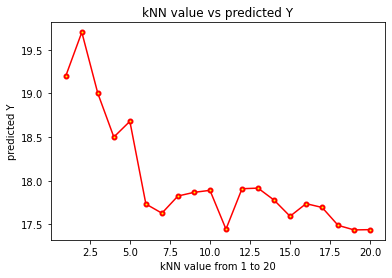

In [34]:
#plotting k values of kNN with respect to their predicetd Y values
predicted_y =[]
for i in range(1,21):
    i = knn(trainX, trainY,testX, k=i)
    predicted_y.append(i)
plt.plot(range(1,21),predicted_y,color = "r",marker = "o",markersize = 4,markerfacecolor="yellow",markeredgewidth = 2)
plt.xlabel("kNN value from 1 to 20")
plt.ylabel("predicted Y")    
plt.title("kNN value vs predicted Y")